Datasets & DataLoaders

- 데이터 샘플 처리를 위한 코드는 심플하게 유지하기 어려움
- **더 나은 가독성과 모듈성**을 위해 *dataset 코드를 model training 코드로부터 분리*하는데 사용




(0_Quickstart 에서 반복되는 내용)
PyTorch has two primitives to work with data:
  1. torch.utils.data.DataLoader
  2. torch.utils.data.Dataset

- Dataset: 
  - stores the sample and their corresponding labels
- DataLoader: 
  - wraps an iterable around the Dataset

# Loading a Dataset

In [28]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Download training data from open datasets
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
)

# Download test data from open datasets
test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
)

# Iterating and Visualizing the Dataset

- Datasets를 리스트처럼 인덱싱할 수 있음: training_data[index]


In [29]:
sample_idx = torch.randint(len(training_data), size=(1,)).item()
sample_idx

45642

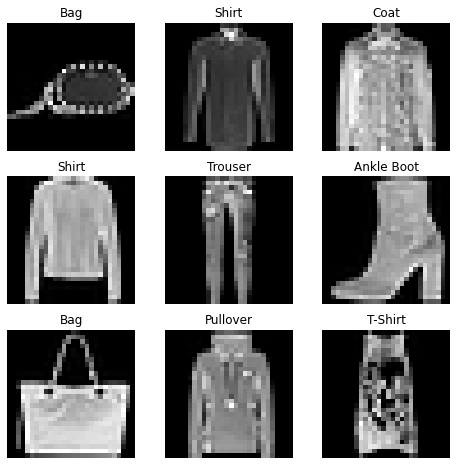

In [30]:
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

figure = plt.figure(figsize = (8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()

# Creating a Custom Dataset for your files

A custom Dataset class must implement three functions
1. init
2. len
3. getitem

In [31]:
import os
import pandas as pd
from torchvision.io import read_image

# fashionMNIST images are stored in a directory: img_dir
# fashionMNIST labels are stored separately in a csv file annotation_file.

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file) 
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label

## _ _ init _ _

is run once when instantiating the Dataset object.
we initialize
- the directory containing the images
- the annotations file
- both transforms

In [32]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
  self.img_labels = pd.read_csv(annotations_file) 
  self.img_dir = img_dir
  self.transform = transform
  self.target_transform = target_transform

## _ _ len _ _

returns the number of samples in the dataset

In [33]:
def __len__(self):
  return len(self.img_labels)

## _ _ getitem _ _

- loads and returns a sample from the dataset at the given index idx
- Based on the idx, it identifies the image's location on disk, converts that to a tensor using read_image,
- retrieves the corresponding label from the csv data in self.img_lables,
- calls the transform functions on them (if applicable),
- returns the tensor image and corresponding label in a tuple

In [34]:
def __getitem__(self, idx):
  img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
  image = read_image(img_path)
  label = self.img_labels.iloc[idx, 1]
  if self.transform:
    image = self.transform(image)
  if self.target_transform:
    label = self.target_transform(label)
  return image, label

# Preparing your data for training with DataLoaders

[Dataset]:
- retrieves our dataset’s features and labels one sample at a time. 
- (for training) we want to
  - pass samples in “minibatches”, 
  - reshuffle the data at every epoch to reduce model overfitting,
  - use Python’s multiprocessing to speed up data retrieval.

[DataLoader]:
- is an iterable that abstracts this complexity for us in an easy API.

In [35]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Iterate through the DataLoader

- We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. 

- Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). 

- Because we specified shuffle=True, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at Samplers).

In [36]:
print(iter(train_dataloader)) # returns an iterator
print(next(iter(train_dataloader))) # calls the __next__() method on the iterator to get the first iteration

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


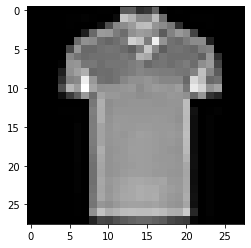

Label: 0


In [37]:
# display image and label

train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {label}')

In [38]:
train_features, train_labels = next(iter(train_dataloader))

In [39]:
train_features[0].squeeze() # return a tensor with all the dimensions of input of size 1 removed

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.1882, 0.2588, 0.3686, 0.4745, 0.3765, 0.2157, 0.2588,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000,
         0.1020, 0.7647, 0.8157, 0.6706, 0.6549, 0.7216, 0.6431, 0.6314, 0.8118,
         0.7333, 0.0235, 0.0000, 0.0118, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000,
         0.0196, 0.8275, 0.8039, 0.7020, 0.5451, 0.5176, 0.5098, 0.6902, 0.8000,
         0.8157, 0.0078, 0.0000, 0.0118, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000,
         0.0000, 0.7490, 0.8000, 0.7961, 0.8510, 0.8353, 0.8549, 0.7882, 0.7961,
         0.7725, 0.0000, 0.0000, 0.0118, 0.0000, 0.0000

In [40]:
x = torch.zeros(2,1,2,1,2)
print(x.size(),'\n')
print(x)

torch.Size([2, 1, 2, 1, 2]) 

tensor([[[[[0., 0.]],

          [[0., 0.]]]],



        [[[[0., 0.]],

          [[0., 0.]]]]])


In [41]:
# torch.squeeze: 
# return a tensor with all the dimensions of input of size 1 removed
y = torch.squeeze(x)
print(y.size(),'\n')
print(y)

torch.Size([2, 2, 2]) 

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])


In [42]:
y = torch.squeeze(x, 0) 
# x: tensor input
# 0: dim(optional) - if given, the input will be squeezed only in this dimension
print(y.size(),'\n')
print(y)

torch.Size([2, 1, 2, 1, 2]) 

tensor([[[[[0., 0.]],

          [[0., 0.]]]],



        [[[[0., 0.]],

          [[0., 0.]]]]])


In [43]:
y = torch.squeeze(x, 1)
print(y.size(),'\n')
print(y)

torch.Size([2, 2, 1, 2]) 

tensor([[[[0., 0.]],

         [[0., 0.]]],


        [[[0., 0.]],

         [[0., 0.]]]])
